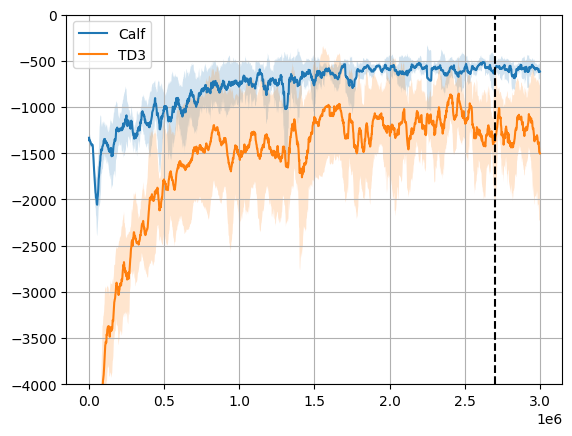

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import root_scalar


calfq_data = pd.read_csv('expdata/calfq.csv')
td3_data = pd.read_csv('expdata/td3.csv')

def select_metrics(data, metric_name):
    return data[data["key"] == metric_name]



means = select_metrics(calfq_data, "charts/episodic_return_rolling_20").groupby('step')["value"].mean()
stds = select_metrics(calfq_data, "charts/episodic_return_rolling_20").groupby('step')["value"].std()

plt.plot(means, label='Calf')
plt.fill_between(means.index, means - stds, means + stds, alpha=0.2)

means = select_metrics(td3_data, "charts/episodic_return_rolling_20").groupby('step')["value"].mean()
stds = select_metrics(td3_data, "charts/episodic_return_rolling_20").groupby('step')["value"].std()

plt.plot(means, label='TD3')
plt.axvline(x=0.9 * 3_000_000, color='black', linestyle='--')
plt.fill_between(means.index, means - stds, means + stds, alpha=0.2)
plt.ylim(-4000, 0)
plt.legend()
plt.grid()
plt.show()


In [ ]:
print("CALFQ GOAL REACHING RATE AFTER 2.7M STEPS (closer to 1 is better)")

is_in_hole =select_metrics(calfq_data, "episode_stats/is_in_hole")
is_in_hole = is_in_hole[is_in_hole["step"] >= 2_700_000]
print(is_in_hole.groupby("run_id")["value"].mean().mean(),  "+-", is_in_hole.groupby("run_id")["value"].mean().std())

print("TD3 GOAL REACHING RATE AFTER 2.7M STEPS (closer to 1 is better)")
is_in_hole =select_metrics(td3_data, "episode_stats/is_in_hole")
is_in_hole = is_in_hole[is_in_hole["step"] >= 2_700_000]
print(is_in_hole.groupby("run_id")["value"].mean().mean(), "+-", is_in_hole.groupby("run_id")["value"].mean().std())

print("--------------------------------")

print("CALFQ HIGH COST REGION AVOIDANCE RATE AFTER 2.7M STEPS (closer to 1 is better)")
high_cost_region = select_metrics(calfq_data, "episode_stats/n_in_spot")
high_cost_region = high_cost_region[high_cost_region["step"] >= 2_700_000]
print(1 - high_cost_region.groupby("run_id")["value"].mean().mean(), "+-", high_cost_region.groupby("run_id")["value"].mean().std())

print("TD3 HIGH COST REGION AVOIDANCE RATE AFTER 2.7M STEPS (closer to 1 is better)")
high_cost_region = select_metrics(td3_data, "episode_stats/n_in_spot")
high_cost_region = high_cost_region[high_cost_region["step"] >= 2_700_000]
print(1 - high_cost_region.groupby("run_id")["value"].mean().mean(), "+-", high_cost_region.groupby("run_id")["value"].mean().std())

CALFQ GOAL REACHING RATE AFTER 2.7M STEPS (closer to 1 is better)
0.991 +- 0.007416198487095669
TD3 GOAL REACHING RATE AFTER 2.7M STEPS (closer to 1 is better)
0.5720000000000001 +- 0.340782188501688
--------------------------------
CALFQ HIGH COST REGION AVOIDANCE RATE AFTER 2.7M STEPS (closer to 1 is better)
0.99539 +- 0.0014892708879776617
TD3 HIGH COST REGION AVOIDANCE RATE AFTER 2.7M STEPS (closer to 1 is better)
0.9906826666666667 +- 0.00533807986701835


In [9]:
calfq_data.key.unique()


array(['charts/episodic_return_rolling_20', 'charts/episodic_return',
       'episode_stats/is_in_hole', 'episode_stats/is_in_hole_rolling_20',
       'episode_stats/n_in_spot', 'episode_stats/n_safe_actions',
       'episode_stats/n_safe_actions_rolling_20', 'calfq/p_relax',
       'calfq/p_relax_decay'], dtype=object)